# **Fundamentals of Data Science - Winter Semester 2022**


#### Prof. Fabio Galasso, Leonardo Plini (TA), Luca Scofano (TA), Paolo Mandica (TA)
<galasso@di.uniroma1.it>, <plini.2000543@studenti.uniroma1.it> , <scofano@di.uniroma1.it>, <mandica@di.uniroma1.it>

## **#2 Homework: Classification**


-----------------------------------

*Note: your task is to fill in the missing code where you see `"YOUR CODE HERE"` and the text part `"WRITE YOUR TEXT HERE"` part corresponding to each subproblem and produce brief reports on the results whenever necessary.*

As part of the homework, provide the answer to questions in this notebook report-like manner. 

After you have implemented all the missing code in the required sections, you will be able to run all the code without any errors. 

We kindly ask you to double-check this since **all** the delivered homework will be executed.

The completed exercise should be handed in as a single notebook file. Use Markdown to provide equations. Use the code sections to provide your scripts and the corresponding plots.

-------------------------------------

**Submit it** by sending an email to:

**galasso@di.uniroma1.it** , **mandica@di.uniroma1.it**, **scofano@di.uniroma1.it**, and **plini.2000543@studenti.uniroma1.it** **by Monday, November 17th, 23:59**.

-------------------------------------

**Outline and Scores for #2 Homework:**


* **Question 1: Logistic Resgression and Gradient Ascent** *(10 points)*
  * **Question 1.1: Log-likelihood and Gradient ascend rule**
  * **Question 1.2: Implementation of logistic regression with Gradient Ascent**
  * **Question 1.3: Report**

* **Question 2: Logistic Regression with non linear boundaries** *(7 points)*
  * **Question 2.1: Polynomial features for logistic regression**
  * **Question 2.2: Plot the computed non-linear boundary**
  * **Question 2.3: Report**

* **Question 3: Multinomial Classification** *(13 points)*
  * **Question 3.1: Softmax Regression Model**
  * **Question 3.2: Coding**
  * **Question 3.3: Meseaure of Godness**
  * **Question 3.4: Report**

* **BONUS Question 4: Transfer Learning on CIFAR-10** *(5 points)*
  * **Question 4.1: Train a KNN Classifier on CIFAR-10**
  * **Question 4.2: Train a Softmax Classifier on CIFAR-10**
  * **Question 4.3: Report**
  

**TOTAL POINTS ARE 35, BONUS QUESTION INCLUDED**

**Notation:**

- $x^{(i)}$ is the $i^{th}$ feature vector
- $(y^{(i)})$ is the expected outcome for the $i^{th}$ training example
- $m$ is the number of training examples
- $n$ is the number of features

**Let's start by setting up our Python environment and importing the required libraries:**

In [1]:
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import scipy as sp # imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm # allows us easy access to colormaps
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd # lets us handle data as dataframes
from sklearn.datasets import make_classification
import seaborn as sns
from tqdm import tqdm

# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns # sets up styles and gives us more plotting options

## **Question 1: Logistic Regression with Gradient Ascent *(10 Points)***

### **Question 1.1: Log-likelihood and Gradient ascend Rule *(3/10 Points)*** 

Write the likelihood $L(\theta)$ and log-likelihood $l(\theta)$ of the parameters $\theta$.

Recall the probabilistic interpretation of the hypothesis $h_\theta(x)= P(y=1|x;\theta)$ and that $h_\theta(x)=\frac{1}{1+\exp(-\theta^T x)}$.

Also derive the gradient $\frac{\delta l(\theta)}{\delta \theta_j}$ of $l(\theta)$ and write the gradient update equation. 

-------------------------------------------------------


Since we are considering a binary classification task, starting from the given probabilistic interpretation for the hypothesis in the positive case, we can write the probabilistic interpretation for the negative case as $ P(y=0|x;\Theta) = 1 - P(y=1|x;\Theta) = 1 - h_{\Theta}(x)$

Our goal is to maximize the above probability, which amounts to maximize the Likelihood of $\Theta$, $L(\Theta)$, since we want to find the $ \Theta $ parameters that maximize the probability.<br>
We talk about the $ \Theta $ parameters because we are dealing with $ h_{\Theta} $, a model parametrized in $ \Theta $.

In order to start setting the optimization problem up, we will first join the formulations for the positive and negative case into one unique formula:

$ \displaystyle P(y | x ; \Theta) = h_{\Theta}(x)^y (1 - h_{\Theta}(x))^{1 - y} $

It is easy to mathematically show that the formula works and it yields to the same formulas seen above:
* $ P(y = 1 | x ; \Theta) = h_{\Theta}(x)^1 (1 - h_{\Theta}(x))^{1 - 1} =  h_{\Theta}(x) $
* $ P(y = 0 | x ; \Theta) = h_{\Theta}(x)^0 (1 - h_{\Theta}(x))^{1 - 0} =  1 - h_{\Theta}(x) $

Up until now, we have always considered just one single datapoint (in fact, we have always written lower-case $x$ and lower-case $y$).<br>
If we were to consider the entire dataset, using the design matrix (i.e., capital $X$) and placing all the ground-truth values into a column vector $Y$, we would write: $ P(Y | X ; \Theta) $.

Note that, if we want to switch back to considering single datapoints, we can write:

$$ 

\begin{aligned}

 \displaystyle
 
 L(\Theta) &= P(Y | X ; \Theta)  \\
 
 &= \text{thanks to independence between the various datapoints TODO reprhase it in terms of random variables} \\

 &= \prod_{i = 1}^m P(y^{(i)} | x^{(i)} ; \Theta) \\

 &= \text{which can be rewritten as follows, as seen above} \\
 
 &= \prod_{i = 1}^m h_{\Theta}(x^{(i)})^{y^{(i)}} (1 - h_{\Theta}(x^{(i)}))^{1 - y^{(i)}} 

\end{aligned}
 

$$

Instead of considering the Likelihood, we will switch to the log Likelihood, $ l(\Theta) = log\ L(\Theta) $, for optimization convenience reasons

$$

\begin{aligned}

\displaystyle

l(\Theta) &= log\ L(\Theta) \\

&= \text{as seen in the previous block, L(} \Theta \text{) can be rewritten as} \\

&= log \prod_{i = 1}^m h_{\Theta}(x^{(i)})^{y^{(i)}} (1 - h_{\Theta}(x^{(i)}))^{1 - y^{(i)}} \\

&= \text{using property of logarithms, products become summations} \\

&= \sum_{i = 1}^m y^{(i)} \ log\ h_{\Theta}(x^{(i)})\ +\ (1 - y^{(i)})\ log\ (1 - h_{\Theta}(x^{(i)})) \\

\end{aligned}

$$

We want to maximize the log Likelihood, so, we set the following optimization problem

$$

\underset{\Theta}{max}\ l(\Theta)

$$

To solve the maximization problem, we can use Gradient Ascent.
Since we know that the log likelihood of a Gaussian distribution is concave, thanks to how Gradient Ascent/Descent is designed, we have optimality guarantees.

One key component of Gradient Ascent/Descent is the update step, for which we need to compute the derivative of the loss function, w.r.t. all $ \theta $ parameters.<br>
In fact, this is the update step formalization


$$

\displaystyle

\theta_j = \theta_j + \alpha \frac{\delta}{\delta \theta_j} l(\Theta)

$$

The derivation of the log likelihood is as follows:


$$

\begin{aligned}

\frac{\delta}{\delta \theta_j} l(\Theta) &= \text{plugging in the re-worked log likelihood formula obtained in previous steps} \\
\\
&= \frac{\partial}{\partial \theta_j} \sum_{i = 1}^m \left [ y^{(i)} \ log\ h_{\Theta}(x^{(i)})\ +\ (1 - y^{(i)})\ log\ (1 - h_{\Theta}(x^{(i)})) \right ] \\
\\
&= \text{via linearity of the gradient, we can bring it inside the summation} \\
\\
&= \sum_{i=1}^m \frac{\partial}{\partial \theta_j} \left [y^{(i)} log(h_{\theta}(x^{(i)}))+ (1-y^{(i)})log(1-h_{\theta}(x^{(i)})) \right ] \\
\\
&= \text{since the gradient is a linear operator, we can distribute it along the internal summation} \\
\\
&= \sum_{i=1}^m \left [ \frac{\partial}{\partial \theta_j} y^{(i)} \ log(h_{\theta}(x^{(i)}))+ \frac{\partial}{\partial \theta_j}(1-y^{(i)})log(1-h_{\theta}(x^{(i)})) \right ] \\
\\
&= \text{let's remember that in Logistic Regression we set } h_{\Theta}(x) \text{to} \frac{1}{1 + e^{\Theta^T x}} \text{, meaning that we have} \\
&\  log(h_\theta(x^{(i)}))=log(\frac{1}{1+e^{-\theta x^{(i)}} })=-log ( 1+e^{-\theta x^{(i)}} )\ \text{and} \\
\\
&\  log(1- h_\theta(x^{(i)}))=log(1-\frac{1}{1+e^{-\theta x^{(i)}} })=log (e^{-\theta x^{(i)}} )-log ( 1+e^{-\theta x^{(i)}} )=-\theta x^{(i)}-log ( 1+e^{-\theta x^{(i)}} )
\\
&= \text{plugging these reworked parts, we get} \\
\\
&= \sum_{i=1}^m \frac{\partial}{\partial \theta_j} \left[ -y^{(i)}(log ( 1+e^{-\theta x^{(i)}})) + (1-y^{(i)})(-\theta x^{(i)}-log ( 1+e^{-\theta x^{(i)}} ))\right] \\
\\
&= \text{performing some algebraic semplifications and manipulations, we get} \\
\\
&= \sum_{i=1}^m \frac{\partial}{\partial \theta_j} \left[y_i\theta x^{(i)}-\log(1+e^{\theta x^{(i)}})\right] \\
\\
&= \text{distributing the derivativation w.r.t. internal addition} \\
\\
& \sum_{i=1}^m \left[\frac{\partial}{\partial \theta_j} y_i\theta x^{(i)}- \frac{\partial}{\partial \theta_j} \log(1+e^{\theta x^{(i)}})\right] \\
\\
&= \text{we can now derive the two pieces} \\
&   \text{TODO PLACE DERIVATIVE OF THE FIRST PIECE HERE} \\
&   \text{TODO PLACE DERIVATIVE OF THE SECOND PIECE HERE} \\
\\
&= \text{plugging the derived pieces, we get} \\
\\
&= \sum_{i=1}^m \left[ y_i\ x^{(i)}_j - \frac{\partial}{\partial \theta_j} x^{(i)}_jh_\theta(x^{(i)}) \right] \\
\\
&= \text{which turns out to be exactly what we have seen in class, after some algebraic manipulation} \\
\\
&= \sum_{i = 1}^m \left [y^{(i)} - h_{\theta}(x^{(i)}) \right ] x^{(i)}_j










% &= \text{applying the chain rule to derive w.r.t. } \theta_j \text{, we get} \\
% \\
% &=\sum_{i=1}^m [ \frac{y^{(i)}}{h_{\theta}x^{(i)}}- \frac{1-y^{(i)}}{1-h_{\theta}x^{(i)}}]\frac{\partial}{\partial \theta_j}h_{\theta}x^{(i)} \\
% \\

% \\
% &= \sum\limits_{i = 1}^m \bigl[y^{(i)} - h_{\theta}(x^{(i)}) \bigr] x^{(i)}_j


\end{aligned}

$$


Thanks to this for the multiple log manipulation hints, we would have not been able to perform the computation without its support: https://math.stackexchange.com/a/477261




-------------------------------------------------------

### **Question 1.2: Implementation of logistic regression with Gradient Ascent *(5/10 Points)***

Translate the equations you wrote above in code to learn the logistic regression parameters.

The dataset used here is created using *make_classification* function present in the *sklearn* library. 

$x^{(i)}_1$ and $x^{(i)}_2$ represent the two features for the $i$-th data sample $x^{(i)}$ and $y^{(i)}$ is its ground truth label.




**Do not write below this line just run it**

--------------------------------------------

In [2]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=5)
X.shape, y.shape

((500, 2), (500,))

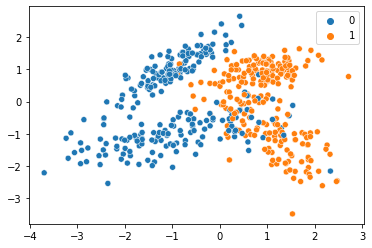

In [3]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y);

Adding a column of 1's to $X$ to take into account the zero intercept

In [4]:
x = np.hstack([np.ones((X.shape[0], 1)), X])

In [5]:
[x[:5,:],x[-5:,:]] # Plot the first and last 5 lines of x, now containing features x0 (constant=1), x1 and x2

[array([[ 1.        ,  2.25698215, -1.34710915],
        [ 1.        ,  1.43699308,  1.28420453],
        [ 1.        ,  0.57927295,  0.23690172],
        [ 1.        ,  0.42538132, -0.24611145],
        [ 1.        ,  1.13485101, -0.61162683]]),
 array([[ 1.        ,  1.56638944,  0.81749944],
        [ 1.        , -1.94913831, -1.90601147],
        [ 1.        ,  1.53440506, -0.11687238],
        [ 1.        , -0.39243599,  1.39209018],
        [ 1.        , -0.11881249,  0.96973739]])]

In [6]:
[y[:5],y[-5:]] # Plot the first and last 5 lines of y

[array([1, 1, 1, 0, 1]), array([1, 0, 0, 0, 1])]

Define the sigmoid function **sigmoid**, the function to compute the gradient of the log likelihood  **grad_l** and the gradient ascent algorithm.


**Write your code below this line**

--------------------------------------------

In [7]:
def sigmoid(x):
    '''
    Function to compute the sigmoid of a given input x.
    
    Input:
    x: it's the input data matrix. The shape is (N, H)

    Output:
    g: The sigmoid of the input x
    '''

    # Simply applying the definition of sigmoid function
    # Usage of np.exp rather than math.exp grants support for vectorization, 
    # which should come in handy later on
    return 1 / (1 + np.exp(-x))

def log_likelihood(theta,features,target):
    '''
    Function to compute the log likehood of theta according to data x and label y
    
    Input:
    theta: it's the model parameter matrix.
    features: it's the input data matrix. The shape is (N, H)
    target: the label array
    
    Output:
    log_g: the log likehood of theta according to data x and label y
    '''

    # Getting the number of elements in the dataset, according to the shape
    # specified in method documentation
    N = features.shape[0] 

    # Getting the predictions, according to our model/hypothesis
    preds = predictions(features, theta)
    # preds.shape --> (N, ), which makes sense, because we need to predict one
    # value for each datapoint (we have N datapoints)

    # Computing the left side of the log likelihood
    positive_side = target * np.log(preds)
    # positive_side.shape: (N, )
    
    # Computing the other side of the log likelihood
    negative_side = (1 - target) * np.log(1 - preds)
    # negative_side.shape: (N, )

    # Combining positive and negative sides
    combined_sides = positive_side + negative_side
    # combined_sides.shape: (N, )

    # Averaging along all the elements of the dataset 
    log_l = 1/N * np.nansum(combined_sides)

    return log_l


def predictions(features, theta):
    '''
    Function to compute the predictions for the input features
    
    Input:
    theta: it's the model parameter matrix.
    features: it's the input data matrix. The shape is (N, H)
    
    Output:
    preds: the predictions of the input features
    '''

    return sigmoid(np.matmul(features, theta))

def update_theta(theta, target, preds, features, lr):
    '''
    Function to compute the gradient of the log likelihood
    and then return the updated weights

    Input:
    theta: the model parameter matrix.
    target: the label array
    preds: the predictions of the input features
    features: it's the input data matrix. The shape is (N, H)
    lr: the learning rate
    
    Output:
    theta: the updated model parameter matrix.
    '''

    # Getting the number of datapoints in the dataset, as per method specs
    N = features.shape[0]

    # print("update_theta --> theta.shape: ", theta.shape)
    # print("update_theta --> features.shape: ", features.shape)
    # print("update_theta --> target.shape: ", target.shape)
    # print("update_theta --> preds.shape: ", preds.shape)

    error = target - preds
    # # # # print("update_theta --> error.shape: ", error.shape)
    # error.shape: (N, ), which makes sense, because we need to have the "distance"
    # of our prediction with the ground truth values, for every datapoint
    # (we have N datapoints)

    # TODO state the fact thet the matrix multiplication already takes case of
    # the summation
    gradient = np.matmul(error.T, features)
    # # # # print("update_theta --> gradient.shape: ", gradient.shape)
    # gradient.shape: (H, ), which makes sense, because we need to have the H
    # partial derivatives, one for each of the parameters

    # Performing the average
    gradient *= 1/N

    # Using the classic gradient descent/ascent update formula
    # Since we are ascending (i.e. in Gradient Ascent), we are moving in the 
    # positive direction (+ sign)
    return theta + lr * gradient 

def gradient_ascent(theta, features, target, lr, num_steps):
    '''
    Function to execute the gradient ascent algorithm

    Input:
    theta: the model parameter matrix.
    target: the label array
    num_steps: the number of iterations 
    features: the input data matrix. The shape is (N, H)
    lr: the learning rate
    
    Output:
    theta: the final model parameter matrix.
    log_likelihood_history: the values of the log likelihood during the process
    '''

    log_likelihood_history = np.zeros(num_steps)

    for step in range(num_steps):
        # Getting the predictions, according to the newly update theta 
        # parameters of the previous iteration 
        preds = predictions(features, theta)

        # Setting the theta parameters to the updated values
        theta = update_theta(
            theta=theta, 
            target=target, 
            preds=preds, 
            features=features,
            lr=lr
        )

        # Storing the log Likelihood for the current step 
        log_likelihood_history[step] = log_likelihood(theta, features, target)

    return theta, log_likelihood_history



**Do not write below this line just run it**

--------------------------------------------

**Check your grad_l implementation:**

grad_l applied to the theta_test (defined below) should provide a value for log_l_test close to the target_value (defined below) *(in other words the error_test should be 0, up to machine error precision.)*

In [8]:
target_value = -1.630501731599431

output_test  = log_likelihood(np.array([-7,4,1]),x,y)
error_test=np.abs(output_test-target_value)

print("{:f}".format(error_test))

0.000000


Let's apply the function gradient_ascent and print the final theta as well as theta_history:

In [9]:
# Initialize theta0
theta0 = np.zeros(x.shape[1])

# Run Gradient Ascent method
n_iter=1000
lr=0.5
theta_final, log_l_history = gradient_ascent(theta0,x,y,lr=lr,num_steps=n_iter)
print(theta_final)


[-0.46097042  2.90036399  0.23146846]


Let's plot the log likelihood over different iterations:


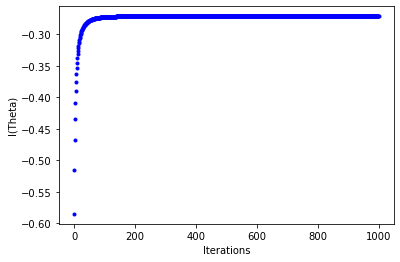

In [10]:
fig,ax = plt.subplots(num=2)

ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history)),log_l_history,'b.')

Plot the data and the decision boundary:

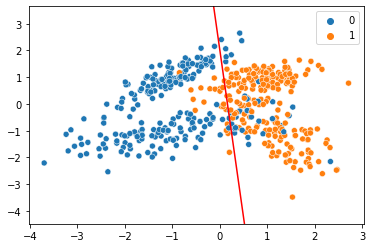

In [11]:
# Generate vector to plot decision boundary
x1_vec = np.linspace(X[:,0].min(),X[:,1].max(),2)

# Plot raw data
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, data=X)

# Plot decision boundary
plt.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="red")
plt.ylim(X[:,1].min()-1,X[:,1].max()+1)
# Save the theta_final value for later comparisons
theta_GA = theta_final.copy()

### **Question 1.3: Report *(2/10 Points)***

1. Are we looking for a local minimum or a local maximum using the gradient ascent rule? 
2. You have implemented the gradient ascent rule. Could we have also used gradient descent instead for the proposed problem? Why/Why not?
3. Let's deeply analyze how the learning rate $\alpha$ and the number of iterations affect the final results. Run the algorithm you have written for different values of $\alpha$ and the number of iterations and look at the outputs you get. Is the decision boundary influenced by these parameters change? Why do you think these parameters are affecting/not affecting the results? 

-------------------------------------------------------

#### <center> 1 #### 

We are looking for a maximum, since we want to maximize the likelihood of the parameters, which would maximize our probability.

In general, one would aim for the global optimum of the loss landscape, especially when dealing with convex functions, for which Gradient Descent/Ascent has optimality guarantees, thanks to the way it is designed and to the geometric shape of a convex function.<br>

In non-convex landscapes, getting to the global minimum is much harder. <br>
In fact, in such cases, we do not have optimality guarantees.<br>
First and foremost, initialization plays an important role, since the starting point may place us in a position from where it is easier to reach a local optimum, rather than a global one.
Getting out of a local optimum, in order to continue towards a global optimum, is not an easy task to do either. Gradient Descent/Ascent tends to get stuck in local optima.<br>
There exist some possible mitigations to this phenomenon, like, for example, adopting momentum.


#### <center> 2 ####

Yes, we could have used Gradient Descent, by means of taking the negative of the log likelihood, i.e. the function we wanted to optimize.<br>
In fact, in the optimization field, maximizing something is equal to minimizing its opposite.<br>
This trick is widely used in the Learning community (for example, in the paper that introduced Variational AutoEncoders).


#### <center> 3 ####

TODO do it later on, in order to have time to create scripts to test multiple configurations of lr and iterations and perform nice plots



-------------------------------------------------------

## **Question 2: Logistic Regression with non linear boundaries *(7 points)***

### **Question 2.1: Polynomial features for logistic regression *(4/7 Points)*** 

Define new features, e.g. of 2nd and 3rd degrees, and learn a logistic regression classifier by using the new features, ans the gradient ascent optimization algorithm defined in Question 1.

In particular, consider a polynomial boundary with equation:

$f(x_1, x_2) = c_0 + c_1 x_1 + c_2 x_2 + c_3 x_1^2 + c_4 x_2^2 + c_5 x_1 x_2 + c_6 x_1^3 + c_7 x_2^3 + c_8 x_1^2 x_2 + c_9 x_1 x_2^2$

Therefore compute 7 new features: 3 new ones for the quadratic terms and 4 new ones for the cubic terms.

Create new arrays by stacking x and the new 7 features (in the order $x_1x_1, x_2x_2, x_1x_2, x_1x_1x_1, x_2x_2x_2, x_1x_1x_2, x_1x_2x_2$). In particular create *x_new_quad* by additionally stacking with x the quadratic features, and *x_new_cubic* by additionally stacking with x the quadratic and the cubic features.

**Do not write below this line just run it**

--------------------------------------------

In [12]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=5)
X.shape, y.shape

((500, 2), (500,))

In [13]:
x = np.hstack([np.ones((X.shape[0], 1)), X])

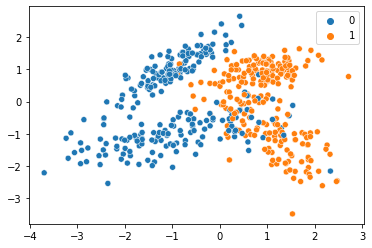

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y);

In [15]:
# First extract features x1 and x2 from x and reshape them to x1 vector arrays
x1 = x[:,1]
x2 = x[:,2]
x1 = x1.reshape(x1.shape[0], 1)
x2 = x2.reshape(x2.shape[0], 1)
print(x[:5,:]) # For visualization of the first 5 values
print(x1[:5,:]) # For visualization of the first 5 values
print(x2[:5,:]) # For visualization of the first 5 values

[[ 1.          2.25698215 -1.34710915]
 [ 1.          1.43699308  1.28420453]
 [ 1.          0.57927295  0.23690172]
 [ 1.          0.42538132 -0.24611145]
 [ 1.          1.13485101 -0.61162683]]
[[2.25698215]
 [1.43699308]
 [0.57927295]
 [0.42538132]
 [1.13485101]]
[[-1.34710915]
 [ 1.28420453]
 [ 0.23690172]
 [-0.24611145]
 [-0.61162683]]


--------------------------------------------
**Write your code below this line**

--------------------------------------------

In [16]:
def get_expansion_size(to_expand, degree, is_bias_included=False):
  
  expansion_size = to_expand.shape[0] + (not is_bias_included)

  for d in range(2, degree + 1):
    row_poly = np.poly1d(to_expand)

    num_added_coeffs = (row_poly ** d).c.shape[0]
    # print(f"degree {d} added {num_added_coeffs} coefficients")

    expansion_size += num_added_coeffs

  return expansion_size

In [17]:
import math

def get_expansion_size_new(to_expand, degree):
  features = to_expand.shape[0]
  
  expansion_size = features
  
  for d in range(2, degree + 1):
    num = math.factorial(features + degree -1)
    den = (math.factorial(degree) * math.factorial(features -1))
    r = num / den
    expansion_size += r 

  return int(expansion_size)

In [18]:
# get_expansion_size(np.asarray([1, 2]), 3)

In [19]:

def new_features(x, degree=2):
    '''
    Function to create n-degree features from the input 

    Input:
    x: the initial features
    degree: the maximum degree you wantthe features
    
    Output:
    features: the final features. 
              2nd degree features must have the order [x, x1x1, x1x2, x2x2]
              3rd degree features must have the order [x, x1x1, x1x2, x2x2, x1x1x1, x1x1x2, x1x2x2, x2x2x2]
    '''
    # end result should be something like this.
    # suppose to have 1 + x + y as input features (which is the case that they used up until now)
    # suppose to want to compute degree 3
    # result should be (1 + x + y) + (1 + x + y)^2 + (1 + x + y)^3
    # judging by actually developing the computation (https://www.symbolab.com/solver/polynomial-equation-calculator/%5Cleft(x%20%2B%20y%5Cright)%20%2B%20%5Cleft(x%20%2B%20y%5Cright)%5E%7B2%7D%20%2B%20%5Cleft(x%20%2B%20y%5Cright)%5E%7B3%7D?or=input)
    # and their explanation on the introductory paragraph

    num_features = x.shape[1] - 1 # excluding the bias
    # expansion_size = get_expansion_size(x[0, 1:], degree, False)
    expansion_size = get_expansion_size(x[0, 1:], degree)
    
    x_copy = np.zeros((x.shape[0], expansion_size))
    x_copy[:, :3] = np.copy(x)

    # for row, row_id in zip(x[0:2, :], range(0, len(x[0:2, :]))):
    for row, row_id in zip(x, range(0, x.shape[0])):

        row = row[1:]

        row_poly = np.poly1d(row)

        concat_start_ind = num_features + 1

        for d in range(2, degree + 1):

            # print("degree: ", d, "\n")

            # print(f"row before expansion           : ", row)
            # print(f"row_poly before expansion      : ", row_poly.c)

            row_poly_exp = row_poly ** d

            # print(f"row_poly.c after {d} power     : ", row_poly_exp.c)
            # print(f"row_poly after {d} power       : ", row_poly_exp)
            # print("row_poly_exp.shape: ", row_poly_exp.c.shape)

            num_poly_coeffs = row_poly_exp.c.shape[0]
            # print("num_poly_coeffs: ", num_poly_coeffs)

            concat_stop_ind = concat_start_ind + num_poly_coeffs

            # print(f"concat range: [{concat_start_ind}, {concat_stop_ind}]")

            x_copy[row_id, concat_start_ind : concat_stop_ind] = row_poly_exp.c
            # print("x_copy[row_id]                  : ", x_copy[row_id])

            concat_start_ind = concat_stop_ind

    return x_copy



**Do not write below this line just run it**

--------------------------------------------

In [20]:
x_new_quad = new_features(x, degree=2)
x_new_cubic = new_features(x, degree=3)

# #reordering output features
temp = np.copy(x_new_quad[:, -1])
x_new_quad[:, -1] = x_new_quad[:, -2]
x_new_quad[:, -2] = temp

temp = np.copy(x_new_cubic[:, -1])
x_new_cubic[:, -1] = x_new_cubic[:, -2]
x_new_cubic[:, -2] = x_new_cubic[:, -3]
x_new_cubic[:, -3] = temp


In [21]:
print(x_new_quad.shape)
print(x_new_cubic.shape)

(500, 6)
(500, 10)


Now use the gradient ascent optimization algorithm to learn theta by maximizing the log-likelihood, both for the case of x_new_quad and x_new_cubic.

In [22]:
# Initialize theta0, in case of quadratic features
theta0_quad = np.zeros(x_new_quad.shape[1])

theta_final_quad, log_l_history_quad = gradient_ascent(theta0_quad,x_new_quad,y,lr=0.5,num_steps=n_iter)

# Initialize theta0, in case of quadratic and cubic features
theta0_cubic = np.zeros(x_new_cubic.shape[1])

# Run Newton's method, in case of quadratic and cubic features
theta_final_cubic, log_l_history_cubic = gradient_ascent(theta0_cubic,x_new_cubic,y,lr=0.5,num_steps=n_iter)

# check and compare with previous results
print(theta_final_quad)
print(theta_final_cubic)

[ 0.07580335  3.32571751  0.27196519 -0.52023668 -0.34131663 -0.02499634]
[ 0.87993463  2.30484531  1.59208762 -1.36919489 -0.25915288 -1.05030762
  0.54174717 -0.58819962  0.43387317  0.54006798]


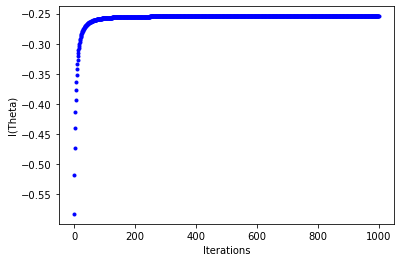

In [23]:
# Plot the log likelihood values in the optimization iterations, in one of the two cases.
fig,ax = plt.subplots(num=2)

ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history_quad)),log_l_history_quad,'b.')

### **Question 2.2: Plot the computed non-linear boundary** 



First, define a boundary_function to compute the boundary equation for the input feature vectors $x_1$ and $x_2$, according to estimated parameters theta, both in the case of quadratic (theta_final_quad) and of quadratic and cubic features (theta_final_cubic). Refer for the equation to the introductory part of Question 2.

--------------------------------------------
**Write your code below this line**

--------------------------------------------

In [24]:
def boundary_function(x1_vec, x2_vec, theta_final):
    
    x1_vec, x2_vec = np.meshgrid(x1_vec,x2_vec)
    
    if len(theta_final) == 6:
        # boundary function value for features up to quadratic
        c_0, c_1, c_2, c_3, c_4, c_5 = theta_final
        
        f = c_0 + c_1*x1_vec + c_2*x2_vec + c_3*(x1_vec**2) + c_4*(x2_vec**2) \
            + c_5*x1_vec*x2_vec 
            
    elif len(theta_final) == 10:
        # boundary function value for features up to cubic
        c_0, c_1, c_2, c_3, c_4, c_5, c_6, c_7, c_8, c_9 = theta_final
        
        f = c_0 + c_1*x1_vec + c_2*x2_vec + c_3*(x1_vec**2) + c_4*(x2_vec**2) \
            + c_5*x1_vec*x2_vec + c_6*(x1_vec**3) + c_7*(x2_vec**3) \
            + c_8*(x1_vec**2)*x2_vec + c_9*x1_vec*(x2_vec**2)
    else:
        raise("Number of Parameters is not correct")
        
    return x1_vec, x2_vec, f


**Do not write below this line just run it**

--------------------------------------------

Now plot the decision boundaries corresponding to the theta_final_quad and theta_final_cubic solutions.

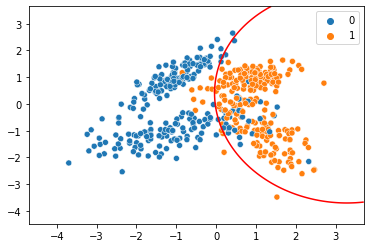

In [25]:
x1_vec = np.linspace(X[:,0].min()-1,X[:,0].max()+1,200);
x2_vec = np.linspace(X[:,1].min()-1,X[:,1].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_quad)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, data=X);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])
plt.show()

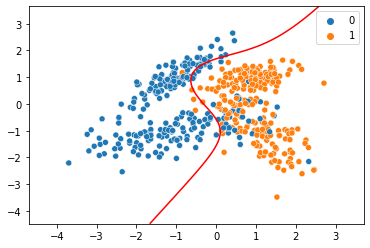

In [26]:
x1_vec = np.linspace(X[:,0].min()-1,X[:,0].max()+1,200);
x2_vec = np.linspace(X[:,1].min()-1,X[:,1].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_cubic)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, data=X);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])
plt.show()

**Confusion Matrix**

Here you can see the confusion matrices related to the three models you've implemented. 


In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

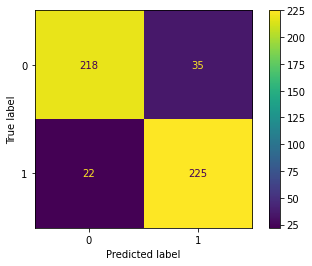

In [28]:
## logistic regression with linear buondary

z = np.dot(x,theta_final)
probabilities = sigmoid(z)
y_hat = np.array(list(map(lambda x: 1 if x>0.5 else 0, probabilities)))
disp = ConfusionMatrixDisplay(confusion_matrix(y, y_hat))
disp.plot()
plt.show()

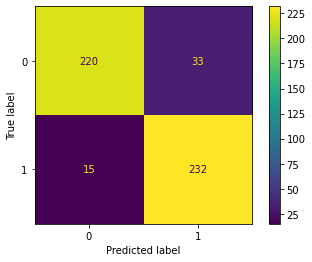

In [29]:
## logistic regression with non linear buondary - quadratic

z = np.dot(x_new_quad,theta_final_quad)
probabilities = sigmoid(z)
y_hat = np.array(list(map(lambda x: 1 if x>0.5 else 0, probabilities)))
disp = ConfusionMatrixDisplay(confusion_matrix(y, y_hat))
disp.plot()
plt.show()

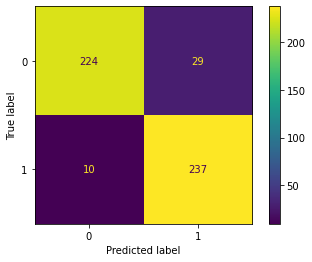

In [30]:
## logistic regression with non linear buondary - cubic

z = np.dot(x_new_cubic,theta_final_cubic)
probabilities = sigmoid(z)
y_hat = np.array(list(map(lambda x: 1 if x>0.5 else 0, probabilities)))
disp = ConfusionMatrixDisplay(confusion_matrix(y, y_hat))
disp.plot()
plt.show()

### **Question 2.3: Report *(3/7 Points)*** 



Write now your considerations. Discuss in particular:
1. Look back at the plots you have generated. What can you say about the differences between the linear, quadratic, and cubic decision boundaries? Can you say if the model is improving in performances, increasing the degree of the polynomial? Do you think you can incur in underfitting increasing more and more the degree?
2. Let's now delve into some quantitative analysis. The three tables you have generated represent the confusion matrix for the model you have implemented in the first two questions. What can you say about actual performances? Does the increase of the degree have a high effect on the results? 


-------------------------------------------------------


**WRITE YOUR ANSWER HERE:**

1.
2.



-------------------------------------------------------

## **Question 3: Multinomial Classification *(13 Points)***

### **Question 3.1: Softmax Regression Model *(4/13 Points)***

In the multinomial classification we generally have $K>2$ classes. So the label for the $i$-th sample $X_i$ is $y_i\in\{1,...,K\}$, where $i=1,...,N$. The output class for each sample is estimated by returning a score $s_i$ for each of the K classes. This results in a vector of scores of dimension K. 
In this exercise we'll use the *Softmax Regression* model, which is the natural extension of *Logistic Regression* for the case of more than 2 classes. The score array is given by the linear model:

\begin{align*}
s_i =  X_i \theta
\end{align*}

Scores may be interpreted probabilistically, upon application of the function *softmax*. The position in the vector with the highest probability will be predicted as the output class. The probability of the class k for the $i$-th data sample is:

\begin{align*}
p_{ik} = \frac{\exp(X_i \theta_k)}{\sum_{j=1}^K(X_i \theta_j))}
\end{align*}

We will adopt the *Cross Entropy* loss and optimize the model via *Gradient Descent*. 
In the first of this exercise we have to: 
-    Write the equations of the Cross Entropy loss for the Softmax regression model;
-    Compute the equation for the gradient of the Cross Entropy loss for the model, in order to use it in the gradient descent algorithm.

#### A bit of notation

*  N: is the number of samples 
*  K: is the number of classes
*  X: is the input dataset and it has shape (N, H) where H is the number of features
*  y: is the output array with the labels; it has shape (N, 1)
*  $\theta$: is the parameter matrix of the model; it has shape (H, K)

--------------------------------------------
**Write you equation below this line**

--------------------------------------------

\begin{align*}
L(\theta) = ...
\end{align*}


\begin{align*}
\nabla_{\theta_k} L(\theta) = ...
\end{align*}


**Do not write below this line just run it**

--------------------------------------------

### **Question 3.2: Coding *(4/13 Points)***

Now we will implement the code for the equations. Let's implement the functions:
-  softmax 
-  CELoss
-  CELoss gradient
-  gradient descent

We generate a toy dataset with *sklearn* library. Do not change anything outside the parts provided of your own code (else the provided checkpoint will not work).

In [31]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=300, n_features=7, n_informative=7, n_redundant=0, n_classes=3, random_state=1)
X.shape, y.shape

((300, 7), (300,))

**Hint for the implementation:** consider the labels $y$ as one-hot vector. This will allow matrix operations (element-wise multiplication and summation).

In [32]:
import scipy
import numpy as np

def class2OneHot(vec):
    out_sparse = scipy.sparse.csr_matrix((np.ones(vec.shape[0]), (vec, np.array(range(vec.shape[0])))))
    out_onehot = np.array(out_sparse.todense()).T
    return out_onehot

y_onehot = class2OneHot(y)

Let's visualize the generated dataset. We use the *Principal Component Analysis* (PCA) as a visualization method. 

PCA summarizes the high-dimensional feature vectors of each sample into two features, which we can illustrate with a 2D plot. 

Look at the following plot. The three generated classes do not seem separable.

In [33]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
finalDf = pd.concat([principalDf, pd.DataFrame(y, columns = ['target'])], axis = 1)

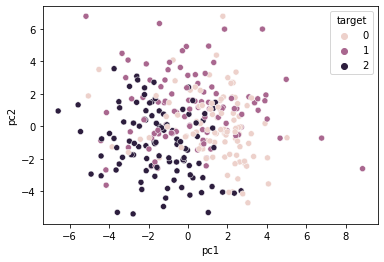

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='pc1', y='pc2', hue='target', data=finalDf);

--------------------------------------------
**Write your code below this line**

--------------------------------------------

In [74]:
def softmax_normalization(x):
    e_x = np.exp(x - np.max(x))

    return e_x / np.expand_dims(e_x.sum(axis=1), 1)

def softmax(theta, X):
    '''
    Function to compute associated probability for each sample and each class.
    
    Input:
    theta: it's the model parameter matrix. The shape is (H, K)
    X: it's the input data matrix. The shape is (N, H)

    Output:
    softmax: it's the matrix containing probability for each sample and each class. The shape is (N, K)
    '''
    
    preds = np.matmul(X, theta)
    
    return softmax_normalization(preds)


def CELoss(theta, X, y_onehot):
    '''
    Function to compute softmax regression model and Cross Entropy loss.
    
    Input:
    theta: it's the model parameter matrix. The shape is (H, K)
    X: it's the input data matrix. The shape is (N, H)
    y_onehot: it's the label array in encoded as one hot vector. The shape is (N, K)

    Output:
    loss: The scalar that is the mean error for each sample.
    '''
    
    A = softmax(theta, X)
    m = X.shape[0]
    
    # TODO refactor in order to NOT show the copy-paste :D
    # return  -(1.0/m) * np.nansum(
    #     y_onehot * np.log(A) + (1 - y_onehot)*np.log(1 - A)
    # )
    # return  -(1.0/m) * np.nansum(y_onehot * np.log(A))
    return  -np.mean(np.sum(y_onehot * np.log(A), axis=1))


def CELoss_jacobian(theta, X, y_onehot):
    '''
    Function to compute gradient of the cross entropy loss with respect the parameters.
    
    Input:
    theta: it's the model parameter matrix. The shape is (H, K)
    X: it's the input data matrix. The shape is (N, H)
    y_onehot: it's the label array in encoded as one hot vector. The shape is (N, K)

    Output:
    jacobian: A matrix with the partial derivatives of the loss. The shape is (H, K)
    '''
    
    # The following code has been vectorized starting from the logical/formal
    # steps produced in the following link
    # https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative 
    
    # Computing the 1(i == j) - S_j step of the linked blog-post
    # y_onehot acts as the indicator function of the link
    error = softmax(theta, X) - y_onehot 
    
    # Computing the S_i(1(i == j) - S_j) step, using 1(i == j) - S_j saved in 
    # the previous step
    # X must be transposed, in order to have matching dimensionalities for the
    # matrix multiplication
    jacobian = np.matmul(np.transpose(X), error) 

    N = X.shape[0]
    jacobian *= 1/N 
    
    return jacobian


def gradient_descent(theta, X, y_onehot, alpha=0.01, iterations=100):
    '''
    Function to compute gradient of the cross entropy loss with respect the parameters.
    
    Input:
    theta: it's the model parameter matrix. The shape is (H, K)
    X: it's the input data matrix. The shape is (N, H)
    y_onehot: it's the label array in encoded as one hot vector. The shape is (N, K)
    alpha: it's the learning rate, so it determines the speed of each step of the GD algorithm
    iterations: it's the total number of step the algorithm performs

    Output:
    theta: it's the updated matrix of the parameters after all the iterations of the optimization algorithm. The shape is (H, K)
    loss_history: it's an array with the computed loss after each iteration
    '''

    # We initialize an empty array to be filled with loss value after each iteration
    loss_history = np.zeros(iterations)
    
    # With a for loop we compute the steps of GD algo
    for it in range(iterations):
        
        theta -= alpha * CELoss_jacobian(theta, X, y_onehot)
        
        loss_history[it] = CELoss(theta, X, y_onehot)

    return theta, loss_history


**Do not write below this line just run it**

--------------------------------------------

In [75]:
# Initialize a theta matrix with random parameters
theta0 = np.random.rand(X.shape[1], len(np.unique(y)))

# TODO deepen into the numerical approximation difference between their result
# and us
print("Initial Loss with initialized theta is:", CELoss(theta0, X, y_onehot))

# Run Gradient Descent method
n_iter = 1000
theta_final, log_l_history = gradient_descent(theta0, X, y_onehot, alpha=0.01, iterations=n_iter)

Initial Loss with initialized theta is: 1.6022317270417883


In [76]:
theta_final

array([[ 0.658657  ,  0.72695169,  0.73859136],
       [ 0.30359937,  0.17192041,  0.27102544],
       [ 0.47369137,  0.48086495,  1.10167585],
       [ 0.52717971,  0.21923368,  1.30101314],
       [ 0.60403761,  0.07801697,  0.10880506],
       [ 0.58086719,  0.57404822,  0.36829331],
       [ 0.45946088, -0.57725212,  0.67657528]])

In [77]:
loss = CELoss(theta_final, X, y_onehot)
loss

0.5859883158913455

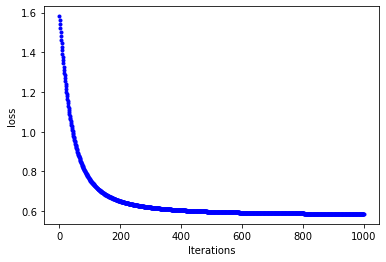

In [78]:
fig,ax = plt.subplots(num=2)

ax.set_ylabel('loss')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history)), log_l_history,'b.')

### **Question 3.3: Meseaure of Godness *(2/13 Points)***

Let's now evaluate the goodness of the learnt based on accuracy:

\begin{equation}
Accuracy = \frac{Number\ of\ correct\ predictions}{Total\ number\ of\ predictions}
\end{equation}

Implement the compute_accuracy function. You may compare the accuracy achieved with learnt model Vs. a random model (random $\Theta$) or one based on $\Theta$'s filled with zeros.

--------------------------------------------
**Write your code below this line**

--------------------------------------------

In [40]:
def compute_accuracy(theta, X, y):
    '''
    Function to compute accuracy metrics of the softmax regression model.
    
    Input:
    theta: it's the final parameter matrix. The one we learned after all the iterations of the GD algorithm. The shape is (H, K)
    X: it's the input data matrix. The shape is (N, H)
    y: it's the label array. The shape is (N, 1)

    Output:
    accuracy: Score of the accuracy.
    '''
    
    # Getting the logits 
    logits = softmax(theta, X)
    
    # Transforming logits in actual predictions, by means of taking the highest
    # probability (hence axis=1)
    preds_one_hot = np.argmax(logits, axis=1)

    # Getting a boolean vector populated with 1, if the prediction matches the
    # ground truth, 0 otherwise
    correct_predictions = (preds_one_hot == y)
    
    # Returning the accuracy as the mean of of correct_predictions, since we have
    # to sum all the values, to get the number of correct predictions, and 
    # divide it by the total number of predictions
    return np.mean(correct_predictions)

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

In [79]:
compute_accuracy(theta_final, X, y)

0.7933333333333333

In [100]:
theta0 = np.random.rand(X.shape[1], len(np.unique(y)))
compute_accuracy(theta0, X, y)

0.12333333333333334

In [92]:
compute_accuracy(np.zeros((X.shape[1], len(np.unique(y)))), X, y)

0.3333333333333333

In [93]:
compute_accuracy(np.ones((X.shape[1], len(np.unique(y)))), X, y)

0.3333333333333333

In [102]:
compute_accuracy(np.ones((X.shape[1], len(np.unique(y)))) * 42, X, y)

0.3333333333333333

In [103]:
compute_accuracy(np.ones((X.shape[1], len(np.unique(y)))) * -42, X, y)

0.3333333333333333

These last four accuracies make a lot of sense.

Having the theta values ​​all equal is equivalent to having no information about the probability that a data point belong into a specific class.

The accuracy is the lowest possible. It is the same as having a dice roll as a class assignment rule: 
* {1,2} first class,
* {3,4} second class,
* {5,6} third class. 

The result is that only in 33 percent of cases the choice turns out to be correct one.


### **Question 3.4: Report *(3 Points)***

Experiment with different values for the learning rate $\alpha$ and the number of iterations. 

Look how the loss plot changes the convergence rate and accuracy metric. 

Report also execution time of each run. For this last step, you could you **time** at the beginning of the cell to display the time needed for the algorithm.

In [44]:
%%time

# Initialize a theta matrix with random parameters
theta0 = np.random.rand(X.shape[1], len(np.unique(y)))

print("Initial Loss with initialized theta is:", CELoss(theta0, X, y_onehot))

# Run Gradient Descent method
n_iter = 100
theta_final, log_l_history = gradient_descent(theta0, X, y_onehot, alpha=0.001, iterations=n_iter)

Initial Loss with initialized theta is: 1.101115112774477
CPU times: user 14 ms, sys: 1.17 ms, total: 15.2 ms
Wall time: 14.4 ms


--------------------------------------------
**Write your report below this line**

--------------------------------------------


| LR | Iter | Accuracy | Time |
|---|---|---|---|
|  |  |  |  |
|  |  |  |  |
|  |  |  |  |
| ... |  |  |  |


## **Question 4 (BONUS): Trasfer Learning on CIFAR-10 _(5 points)_**

**Transfer Learning (TL)** is a machine learning technique that consists in reusing a pre-trained model and its weights to perform a task similar to the one the model has been trained on. Pre-trained models are usually trained using large amounts of data and are really useful if you have just a small dataset to learn from.

In this bonus question you are going to leverage a pre-trained DNN, [**AlexNet**](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf), trained on the IMAGENET dataset, in order to train two classification models on a different, smaller, dataset (CIFAR-10 in this case).

The dataset your are going to use is made of 50000 feature embeddings with 1024 dimensions obtained by encoding the images in CIFAR-10 with the pre-trained AlexNet. This means that your classifier is going to leverage the representation power of a relatively large DNN without the actual need to train in from scratch, which would require high GPU power and many hours/days of training.

For the most curious among you: at the end of the exercise you will find the actual code that we used to encode the CIFAR-10 dataset with AlexNet using the [**PyTorch**](https://pytorch.org/) framework. In case you wanted to run it, we suggest to either use Google Colab with the runtime set to GPU (Runtime -> Change runtime type -> GPU) or a PC/laptop with a relative capable GPU (minimum 4GB of VRAM).

--------------------------------------------
**Do not write below this line, just run it**

--------------------------------------------

In [52]:
# import libraries and set seed
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

np.random.seed(123)

In [53]:
# load the train and test datasets
X_train = np.load('./processed_data/X_train.npy')
y_train = np.load('./processed_data/y_train.npy')
y_onehot_train = np.load('./processed_data/y_onehot_train.npy')

X_test = np.load('./processed_data/X_test.npy')
y_test = np.load('./processed_data/y_test.npy')

In [54]:
# Shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("y_onehot_train shape:", y_onehot_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (50000, 1024)
y_train shape: (50000,)
y_onehot_train shape: (50000, 10)
X_test shape: (10000, 1024)
y_test shape: (10000,)


### **Question 4.1: Train a KNN Classifier on CIFAR-10 _(2/5 points)_**

Your goal is to train a KNN Classification model using the pre-processed and encoded CIFAR-10 dataset (given by us).

The encoded dataset is made of 50000 feature embeddings with 1024 dimensions. The labels are encoded as integers in the range [0,9], they will serve as the target of your classifier.

KNN is a simple and intuitive classification algorithm that works by assigning a label to a new sample based on the labels of the K nearest samples in the training set. The label is the one that appears the most among the K nearest samples.


**HINTS:** 
* You will have to train the KNN classifier on the training set by trying different values of K. At the end you will have to report the accuracy of your model on the test set for the best value of K.
* You **must** use sklearn.neighbors.KNeighborsClassifier to train your model. You can find the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).



In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [56]:
# subsampling data
num_training = 10000
mask = list(range(num_training))
X_train_sub = X_train[mask]
y_train_sub = y_train[mask]

In [57]:
k_range = range(5, 11)
scores = {}
scores_list = []

--------------------------------------------
**Write your code below this line**

--------------------------------------------

In [104]:
def get_knn_accuracy(preds, ground_truth):
  
  return np.mean(preds == ground_truth)

In [118]:
def k_nn_fit_transform(k_range):
  
  preds = {}
  
  for k in tqdm(k_range):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Gotta use the sub portion, in order to have a quick and dirty training,
    # to get the best k value, which will then be used to fit on the entire
    # training set
    trained_knn_classifier = knn_classifier.fit(X_train_sub, y_train_sub)
    
    preds[k] = trained_knn_classifier.predict(X_test)
    
  return preds

In [119]:
scores = k_nn_fit_transform(k_range)

100%|██████████| 6/6 [00:42<00:00,  7.01s/it]


In [120]:
# accuracy for each k value
scores_list = [get_knn_accuracy(scores[k], y_test) for k in k_range]

In [121]:
scores_list

[0.7259, 0.7293, 0.7305, 0.7335, 0.7335, 0.7363]

--------------------------------------------
**Do not write below this line, just run it**

--------------------------------------------

Text(0, 0.5, 'Testing Accuracy')

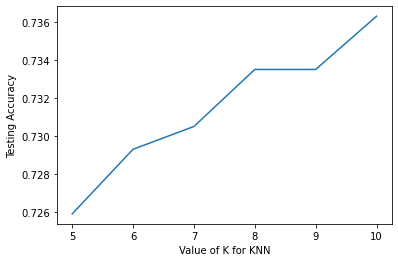

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

--------------------------------------------
**Do not write below this line, just run it**

--------------------------------------------

In [123]:
# now pick the best k and train on the whole training set
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [124]:
# print the accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.7363


### **Question 4.2: Train a Softmax Classifier on CIFAR-10 _(2/5 points)_**

Your goal is to train a Softmax Regression Model using the pre-processed and encoded CIFAR-10 dataset (given by us) and the code written by you in Question 3.2.

Here you have to write the code to train your Softmax Regression Model.  
Your function has to return the inital theta, the learned theta, and the loss history.  
You can evaluate its performance with the code below.

**HINT:** Experiment with different alpha's with a small number of iterations to keep the training time low. Once you find the best alpha you can train your model for as long as needed.

--------------------------------------------
**Write your code below this line**

--------------------------------------------

In [133]:
def fit_softmax_classifier(X_train, y_onehot_train, alpha, n_iter):

    theta0 = np.random.rand(X_train.shape[1], y_onehot_train.shape[1])
    
    theta_final, log_l_history = gradient_descent(
        theta0, X_train, y_onehot_train, alpha, n_iter
    )

    return theta0, theta_final, log_l_history

--------------------------------------------
**Do not write below this line, just run it**

--------------------------------------------

In [140]:
# theta0, theta_final, log_l_history = fit_softmax_classifier(X_train, y_onehot_train, alpha=1e4, n_iter=1000)
theta0, theta_final, log_l_history = fit_softmax_classifier(X_train, y_onehot_train, alpha=1e4, n_iter=300)

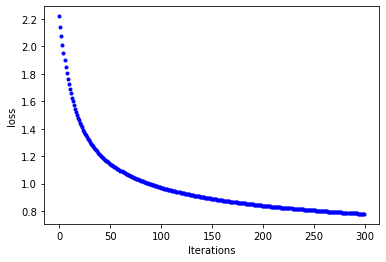

In [141]:
fig,ax = plt.subplots(num=2)

ax.set_ylabel('loss')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history)), log_l_history,'b.')

In [142]:
theta0 = np.random.rand(X_train.shape[1], 10)

acc_rand_train = compute_accuracy(theta0, X_train, y_train)
acc_train = compute_accuracy(theta_final, X_train, y_train)

acc_rand_test = compute_accuracy(theta0, X_test, y_test)
acc_test = compute_accuracy(theta_final, X_test, y_test)

print(f"Accuracy with random parameters on train set: {acc_rand_train}")
print(f"Accuracy with learned parameters on train set: {acc_train}")
print(f"Accuracy with random parameters on test set: {acc_rand_test}")
print(f"Accuracy with learned parameters on test set: {acc_test}")

Accuracy with random parameters on train set: 0.07848
Accuracy with learned parameters on train set: 0.7505
Accuracy with random parameters on test set: 0.0764
Accuracy with learned parameters on test set: 0.7344


### **Question 4.3: Report _(1/5 points)_**

Write a report comparing the results obtained with the two different classifiers.

Try to answer the following questions:
- Which classifier performs better? Why? Is there a trade-off between the two in terms of perfomance/computation time?
- Do the classifiers obtain the same accuracy on train and test sets? If not, try to give an explanation.
- What values of alpha are best to train the two classifiers and what is the optimal number of iterations? 

--------------------------------------------
**Write your report below this line**

--------------------------------------------

Write your report here

### **Code used to create the dataset _(no points)_**

This part of the homework will not give you any points and it is not needed to complete the assignment, so please don't ask for help before the deadline if you are not able to run it.

Run only if you have the following minimum requirements:
- Google Colab with GPU runtime active (Runtime -> Change runtime type -> GPU) or a PC/laptop with a relatively capable GPU (minimum 4GB of VRAM)
- High speed connection and minimum 4GB of free storage
    - the download of the dataset and the weights of the pre-trained AlexNet have large sizes!

In [143]:
# import useful libraries and functions
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np

from sklearn.preprocessing import normalize
from tqdm import tqdm

torch.manual_seed(123)
np.random.seed(123)

In [144]:
# image transform for CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# download CIFAR-10 dataset for train and test
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# download pre-trained AlexNet
pretrained_net = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', weights='AlexNet_Weights.DEFAULT')
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# define the device you will use for training (cpu or cuda)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /home/dansolombrino/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /home/dansolombrino/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

Let's take a look at it!

The network is composed by a backbone with multiple Conv2d, ReLU and MaxPool2d layers, by an average pooling layer, and by a classifier.

We are going to use just the backbone of the pre-trained AlexNet (the layers included into *(features)*) and we will define a new classifier. We will train everything together on the CIFAR-10 dataset and we will leverage the pre-trained weights of the backbone to obtain high classification accuracy with just a few epochs of training. This is the power of Transfer Learning!

In [145]:
pretrained_net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [146]:
# create train and test dataloaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=256, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_data, batch_size=256, shuffle=True, num_workers=2)

In [147]:
# define the encoder network to obtain image embeddings
encoder = pretrained_net.features.to(device).eval()
encoder[12] = nn.MaxPool2d(kernel_size=9, stride=4)
encoder

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=9, stride=4, padding=0, dilation=1, ceil_mode=False)
)

In [148]:
def create_dataset(loader, feat_size, num_classes):
    X = np.empty((0, feat_size))
    y_onehot = np.empty((0, num_classes))

    for i, data in tqdm(enumerate(loader), total=len(loader)):
        images, labels = data[0].to(device), data[1].to(device)
        emb = encoder(images)
        emb = torch.flatten(emb, 1).detach().cpu().numpy()
        X = np.concatenate((X, emb))
        y_temp = nn.functional.one_hot(labels, 10).detach().cpu().numpy()
        y_onehot = np.concatenate((y_onehot, y_temp))

    X = normalize(X, axis=1, norm='l1')
    y = np.argmax(y_onehot, axis=1)
    return X, y, y_onehot

In [149]:
print("Preparing train data...")
X_train, y_train, y_onehot_train = create_dataset(trainloader, 1024, 10)
print("Preparing test data...")
X_test, y_test, _ = create_dataset(testloader, 1024, 10)

Preparing train data...


100%|██████████| 196/196 [00:36<00:00,  5.43it/s]


Preparing test data...


100%|██████████| 40/40 [00:06<00:00,  5.98it/s]


In [ ]:
np.save('./processed_data/X_train.npy', X_train)
np.save('./processed_data/y_train.npy', y_train)
np.save('./processed_data/y_onehot_train.npy', y_onehot_train)

np.save('./processed_data/X_test.npy', X_test)
np.save('./processed_data/y_test.npy', y_test)